# Python for Finance Cookbook
*Eryk Lewinson*

## Chapter 01 : Downloading Data
How to download Apple's stock prices from the years 2011 to 2021

In [5]:
import pandas as pd 
import yfinance as yf 

In [12]:
# Download the data
df = yf.download("AAPL",
                 start="2011-01-01",
                 end="2024-12-31",
                 progress=False)

In [7]:
# Inspect the downloaded data
print(f"Downloaded {len(df)} rows of data.")
df

Downloaded 2768 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,11.630000,11.795000,11.601429,11.770357,9.951280,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.003215,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.085040,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.076889,300428800
2011-01-07,11.928214,12.012500,11.853571,12.004286,10.149058,311931200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.830719,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824463,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798904,79144300


The result of the request is a `pandas` `DataFrame` of 2,768 rows containing daily **Open**, **High**, **Low**, and **Close** (OHLC) prices, as well as the adjusted close price and volume. Yahoo Finance automatically adjusts the close price for stock splits. The adjusted close price takes into account not only splits but also dividends.

### How it works...
The `download` function has some additional features:
+ We can download information for multiple tickers at once by providing a list of tikcers `(["AAPL", "MSFT"])` or multiple tickers as a string `("AAPL MSFT")`
+ We can set `auto_adjust=True` to download only the adjusted prices 
+ We can additionally download dividends and stock splits by setting `actions='inline'`. Those actions can also be used to manually adjust the prices or for other analyses
+ Specifying `progress=False` disables the progress bar
+ The `interval` argument can be used to download data in different frequencies. We could also download intraday data as long as the requested period is shorter than 60 days.

### There is more...
`yfinance` also offers an alternative way of downloading the data: using the `Ticker` class.

In [8]:
# Instantiate the object of the class
aapl_data = yf.Ticker("AAPL")

# Download the historical price data
aapl_data.history()         # By default the method downloads the last month of data
                            # We can use the same arguments as in the 'download' function 


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-03 00:00:00-04:00,220.000000,221.550003,219.029999,221.550003,37369800,0.0,0.0
2024-07-05 00:00:00-04:00,221.649994,226.449997,221.649994,226.339996,60412400,0.0,0.0
2024-07-08 00:00:00-04:00,227.089996,227.850006,223.250000,227.820007,59085900,0.0,0.0
2024-07-09 00:00:00-04:00,227.929993,229.399994,226.369995,228.679993,48076100,0.0,0.0
2024-07-10 00:00:00-04:00,229.300003,233.080002,229.250000,232.979996,62627700,0.0,0.0
2024-07-11 00:00:00-04:00,231.389999,232.389999,225.770004,227.570007,64710600,0.0,0.0
2024-07-12 00:00:00-04:00,228.919998,232.639999,228.679993,230.539993,53046500,0.0,0.0
2024-07-15 00:00:00-04:00,236.479996,237.229996,233.089996,234.399994,62631300,0.0,0.0
2024-07-16 00:00:00-04:00,235.000000,236.270004,232.330002,234.820007,43234300,0.0,0.0


Benefits of using the `Ticker` class:
+ We can download much more information than just prices
+ `info` outputs a JSON object containing detailed information about the stock and its company
+ `actions` outputs corporate actions such as dividends and splits
+ `major_holders` present the names of the major holders
+ `institutional_holders` shows the institutional holders
+ `calendar` shows the incoming events, such as the quarterly earnings


<Axes: xlabel='Date'>

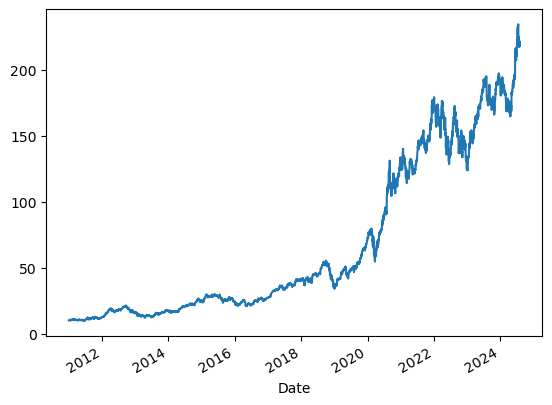

In [13]:
# Tomo solamente la columna que tiene el precio ajustado
adj_close = df["Adj Close"]
adj_close.tail()
adj_close.plot()